<a href="https://colab.research.google.com/github/lkivumbi/Prediction-of-product-sales/blob/main/Prediction_of_product_sales_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of product sales
- Author: Luke Kivumbi

## Project Overview

The first project will be a sales prediction for food items sold at various stores. The goal of this is to help the retailer understand the properties of products and outlets that play crucial roles in increasing sales.

## Load and Inspect Data

##Loading Data

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
#loading data
fpath='/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
import pandas as pd
df = pd.read_csv(fpath)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


#DATA DICTIONARY

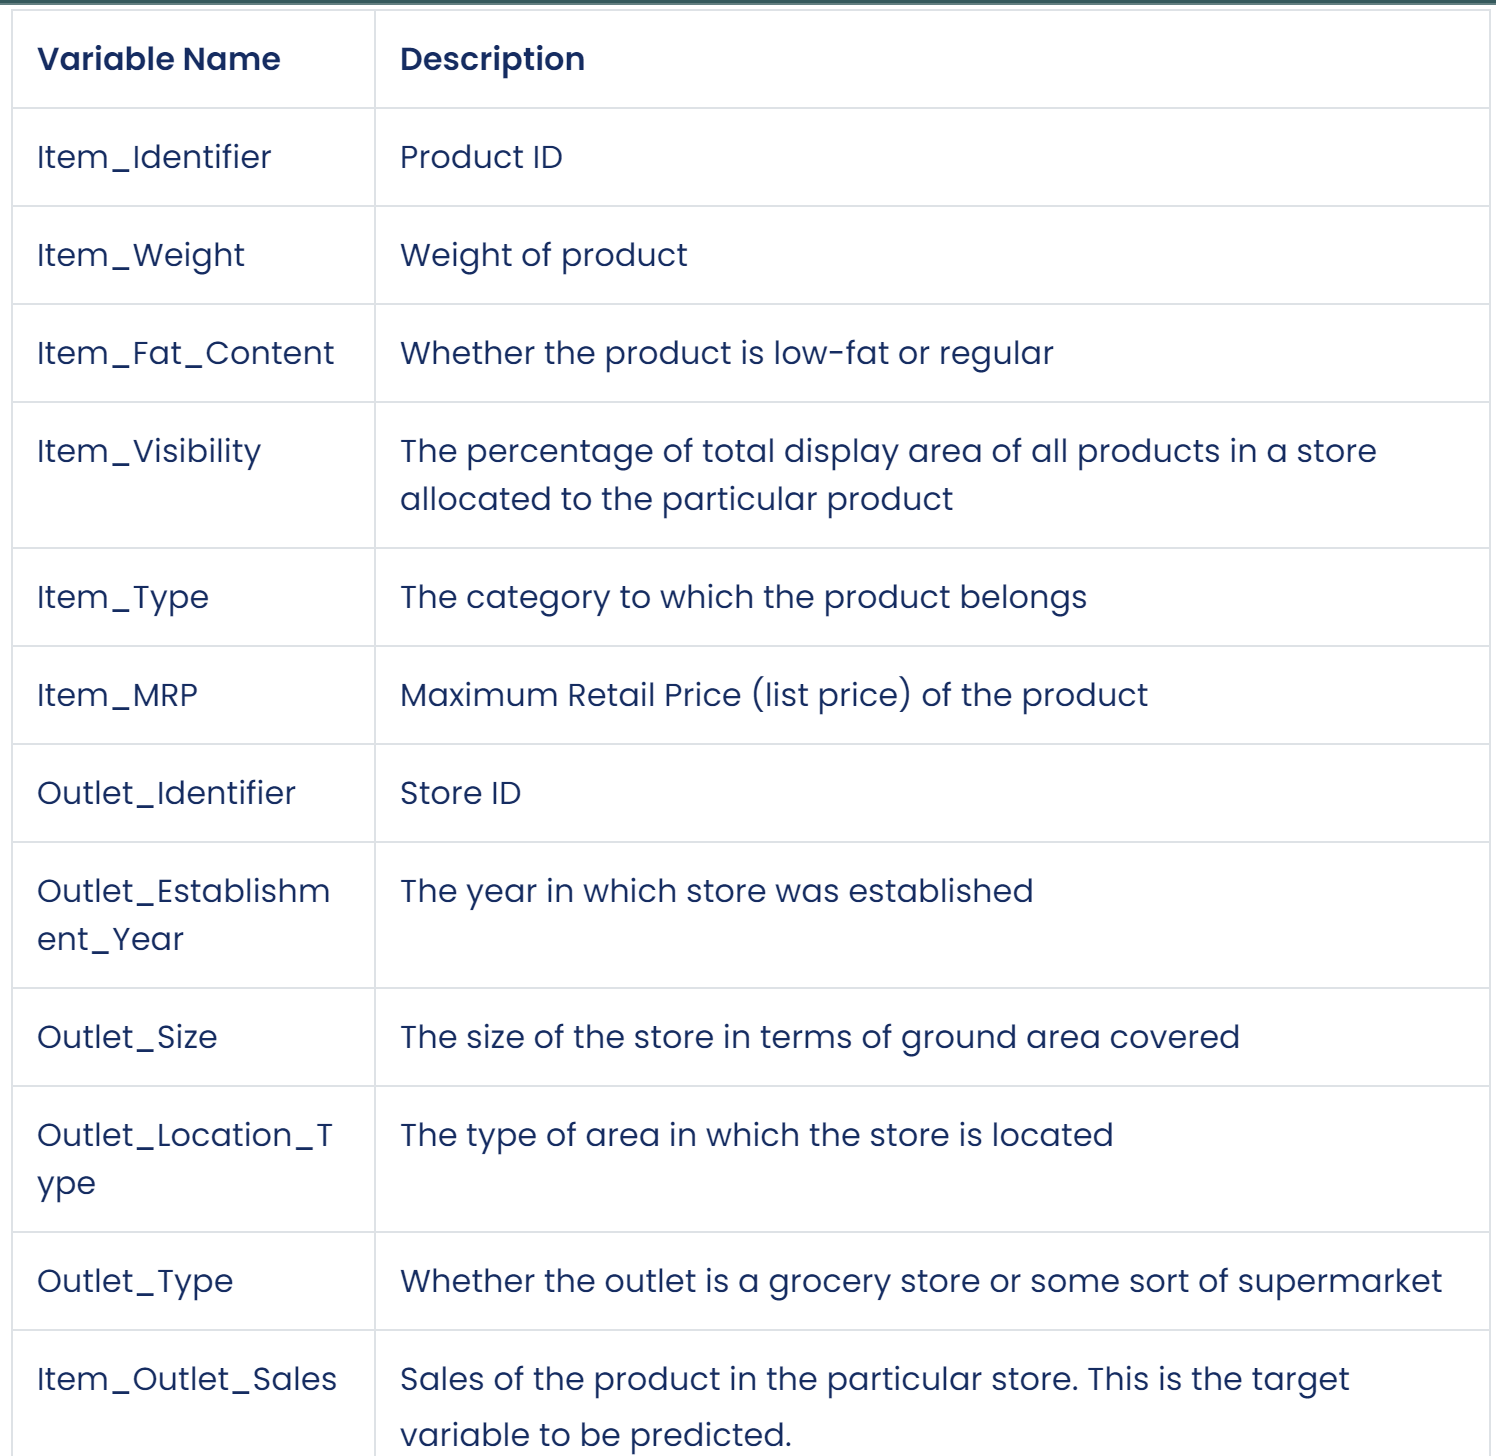

## Clean Data


##Data Cleaning

In [ ]:
df.shape

(8523, 12)

Dataset has 8523 rows and 12 columns

Finding datatypes of each variable

In [ ]:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Finding Duplicates

In [ ]:
df.duplicated().sum()

0

the dataset has not duplicates

Are there any missing values?

In [ ]:
#finding missing values or null values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

two columns appear to have missing values
- Item_weight
- Outlet_size

Item_weight is a float while Outlet_size is a string

In [ ]:
#addressing item weight first
df['Item_Weight'].value_counts()

Item_Weight
12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: count, Length: 415, dtype: int64

In [ ]:
#finding mean of series
df['Item_Weight'].mean().round(2)

12.86

In [ ]:
df['Item_Weight'] = df['Item_Weight'].fillna('MISSING')
df['Item_Weight'].value_counts()

Item_Weight
MISSING    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: count, Length: 416, dtype: int64

Dealing with Outlet_Size

In [ ]:
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [ ]:
#filling with Missing for missing values
df['Outlet_Size'] = df['Outlet_Size'].fillna('Missing')
df['Outlet_Size'].value_counts()

Outlet_Size
Medium     2793
Missing    2410
Small      2388
High        932
Name: count, dtype: int64

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

finding inconsistent objects

In [ ]:
string_cols_list = df.select_dtypes('object').columns
string_cols_list

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
df[string_cols_list].value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Type              Outlet_Identifier  Outlet_Size  Outlet_Location_Type  Outlet_Type      
DRA12            11.6         LF                Soft Drinks            OUT035             Small        Tier 2                Supermarket Type1    1
FDV28            16.1         Regular           Frozen Foods           OUT010             Missing      Tier 3                Grocery Store        1
FDV32            7.785        Low Fat           Fruits and Vegetables  OUT049             Medium       Tier 1                Supermarket Type1    1
                                                                       OUT035             Small        Tier 2                Supermarket Type1    1
                                                                       OUT018             Medium       Tier 3                Supermarket Type2    1
                                                                                                                     

Item_Fat_Content column appears to have inconsistent values

In [ ]:
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [ ]:
#replacing inconsistent values
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg': 'Regular','low fat': 'Low Fat'})
df['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

For numerical columns

In [ ]:
num_cols_list = df.select_dtypes('number').columns
num_cols_list

Index(['Item_Visibility', 'Item_MRP', 'Outlet_Establishment_Year',
       'Item_Outlet_Sales'],
      dtype='object')

In [ ]:
#droping Item_Type and outlet est year
df = df.drop(columns=['Outlet_Establishment_Year'])
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Missing,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


fixing new index

In [ ]:
df=df.set_index('Item_Identifier')
df.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,
FDA15,9.3,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
FDN15,17.5,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Missing,Tier 3,Grocery Store,732.3800
NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052


# Exploratory Data Analysis

## Feature Inspection

##NUMERICAL FEATURE DATA VISUALS

In [ ]:
#identifying numeric columns in our dataset
num_cols = df.select_dtypes('number').columns
num_cols

Index(['Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales'], dtype='object')

Text(0.5, 1.0, 'Histoplot of Item Visibility')

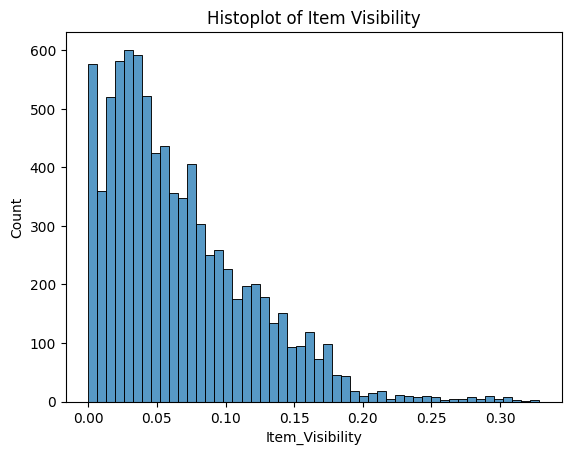

In [ ]:
#analyzing the effects of Item visibility
ax = sns.histplot(data=df, x= 'Item_Visibility')
ax.set_title('Histoplot of Item Visibility')

Most Items are not well displayed.



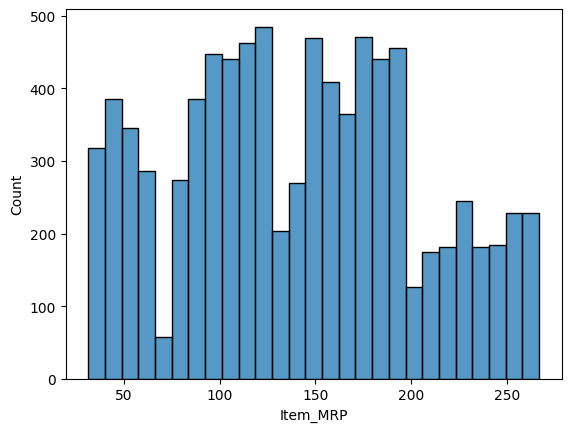

In [ ]:
#Item mrp
ax = sns.histplot(data=df, x='Item_MRP')

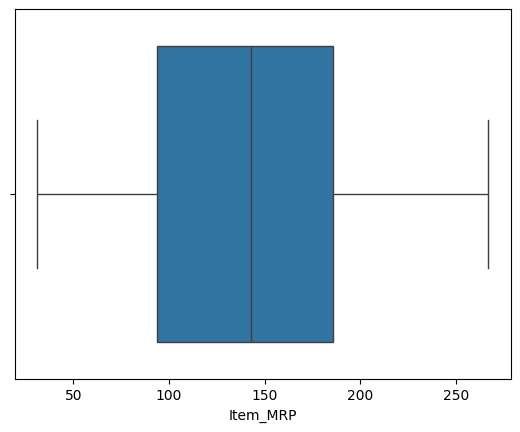

In [ ]:
#boxplot of Item mrp
ax = sns.boxplot(data=df, x='Item_MRP')

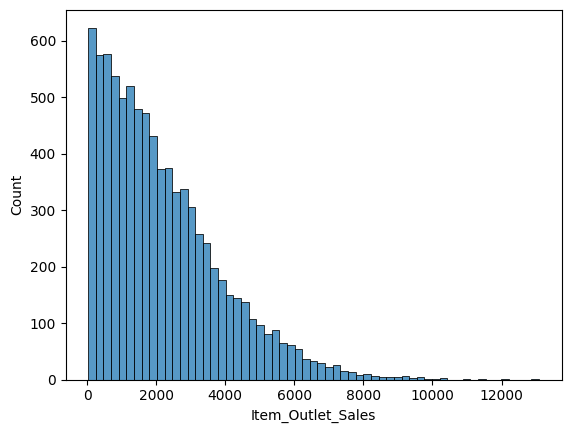

In [ ]:
#visualising Item outlet sales
ax = sns.histplot(data=df, x='Item_Outlet_Sales')

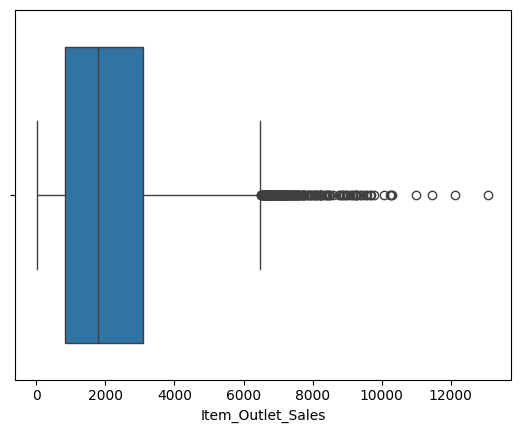

In [ ]:
#boxplot of Item_Outlet_Sales
ax = sns.boxplot(data=df,x='Item_Outlet_Sales')

##Categorical features

In [ ]:
string_cols_list

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Type',
       'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')

In [ ]:
df.select_dtypes('object').nunique()

Item_Weight             416
Item_Fat_Content          2
Item_Type                16
Outlet_Identifier        10
Outlet_Size               4
Outlet_Location_Type      3
Outlet_Type               4
dtype: int64

<ipython-input-30-60e2f573575a>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


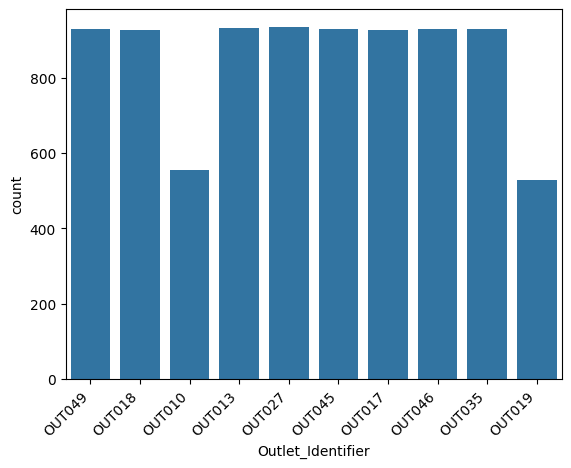

In [ ]:
#countplot of Outlet_Identifier
ax = sns.countplot(data=df,x='Outlet_Identifier');
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

<ipython-input-31-d183d3e7c3d6>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


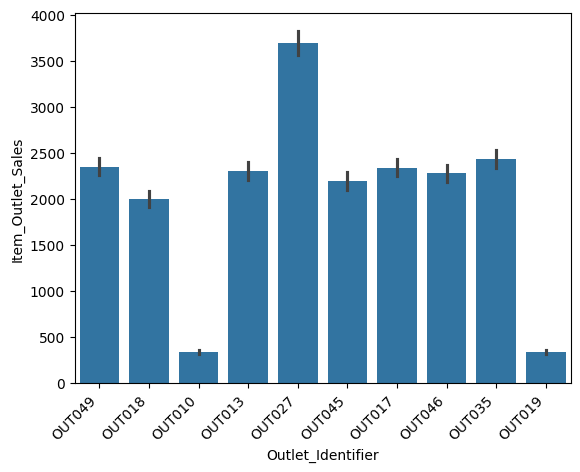

In [ ]:
#barplot of outlet identifier on item outlet sales
ax = sns.barplot(data=df,x='Outlet_Identifier',y='Item_Outlet_Sales')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

<ipython-input-32-7641f57aed46>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


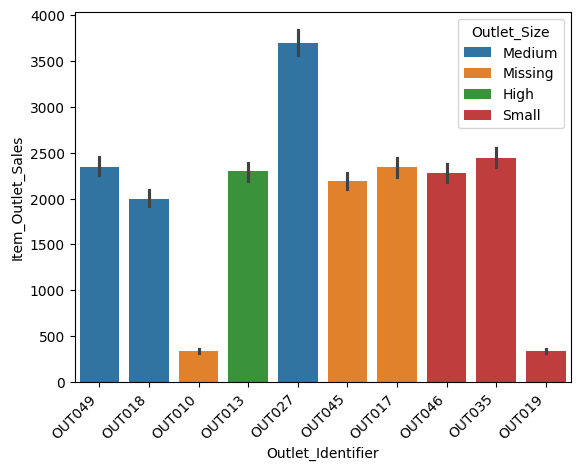

In [ ]:
#barpolot of Outlet Identifier colored according to outlet Size
ax = sns.barplot(data=df,x='Outlet_Identifier',y='Item_Outlet_Sales',hue='Outlet_Size')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

Outlet27 seems to be bringing in the most item sales

<ipython-input-33-07fef64ef05e>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


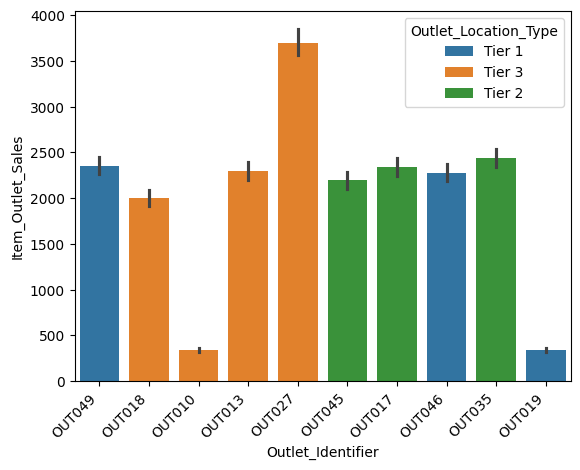

In [ ]:
#barpolot of item identifier colored according to outlet location
ax = sns.barplot(data=df,x='Outlet_Identifier',y='Item_Outlet_Sales',hue='Outlet_Location_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

<ipython-input-34-a51ffa083299>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


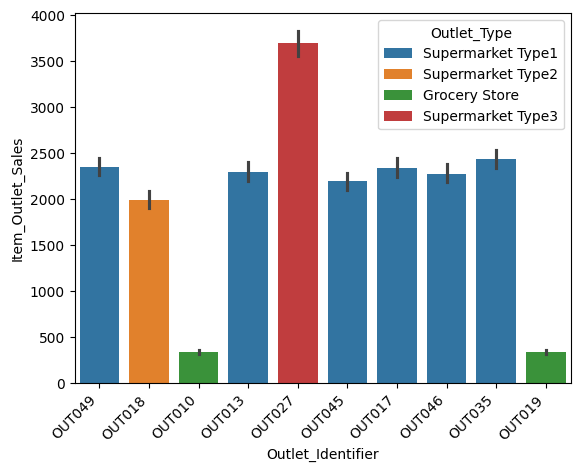

In [ ]:
#barpolot of item identifier colored according to outlet location
ax = sns.barplot(data=df,x='Outlet_Identifier',y='Item_Outlet_Sales',hue='Outlet_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

<ipython-input-35-015330ac93c8>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


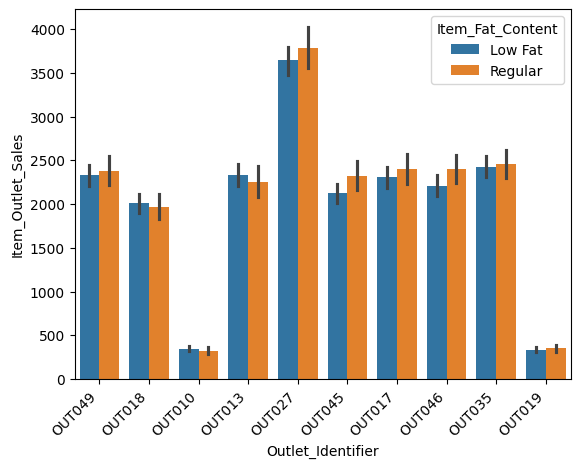

In [ ]:
#barpolot of item Outlet Identifier colored according to Item Fat Content
ax = sns.barplot(data=df,x='Outlet_Identifier',y='Item_Outlet_Sales',hue='Item_Fat_Content')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

Looks like stores sell items with both regular and low fat content in almost the same amounts with those with regular fat slightly egding those with low fat

**which item would be bringing in the most sales**

<ipython-input-36-eedacc40c679>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


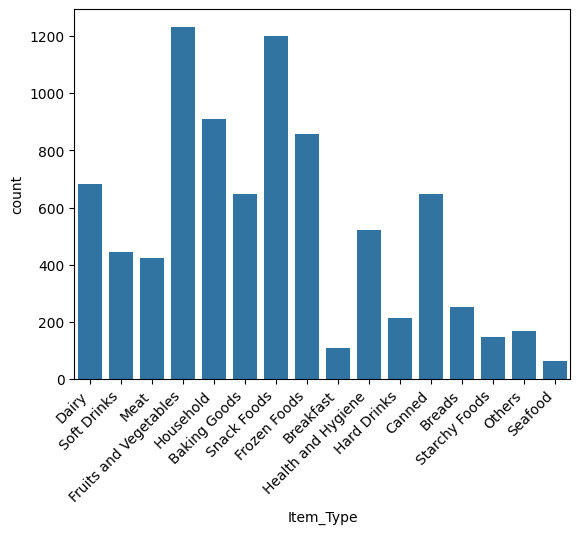

In [ ]:
#countplot of item type
ax = sns.countplot(data=df,x='Item_Type')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

most common items are fruits and vegetables and snack foods

<ipython-input-37-9bac184005ad>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


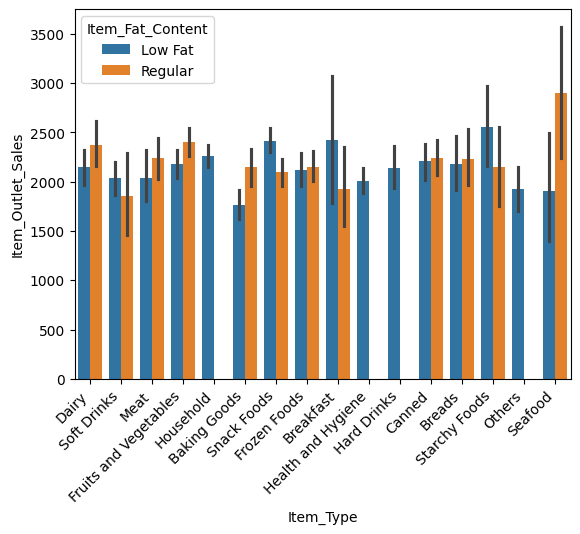

In [ ]:
#barpolot of item type colored according to item fat content
ax = sns.barplot(data=df,x='Item_Type',y='Item_Outlet_Sales',hue='Item_Fat_Content')
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');

##HEATMAP OF THE DATAFRAME

In [ ]:
corr_sales_pred = df.corr(numeric_only=True)
corr_sales_pred.round(2)

,Item_Visibility,Item_MRP,Item_Outlet_Sales
Item_Visibility,1.00,-0.00,-0.13
Item_MRP,-0.00,1.00,0.57
Item_Outlet_Sales,-0.13,0.57,1.00


<Axes: >

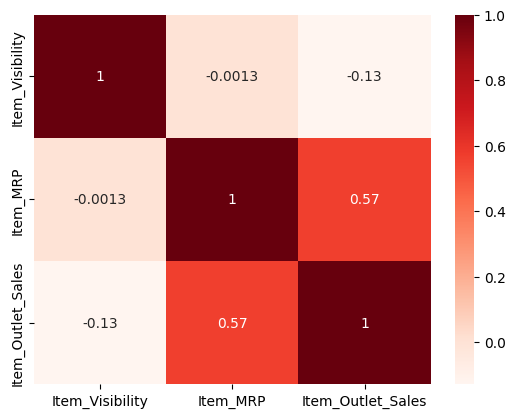

In [ ]:
sns.heatmap(corr_sales_pred,cmap='Reds',annot=True)

Item maximum retail price seems to be fairly positively correlated to the item outlet sales

#PREPARATION FOR MACHINE LEARNING

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Add the print statements to the function
def explore_categorical(df, x, fillna = True, placeholder = 'MISSING',
                        figsize = (6,4), order = None):

  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # Before filling nulls, save null value counts and percent for printing
  null_count = temp_df[x].isna().sum()
  null_perc = null_count/len(temp_df)* 100
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)
  # Create figure with desired figsize
  fig, ax = plt.subplots(figsize=figsize)
  # Plotting a count plot
  sns.countplot(data=temp_df, x=x, ax=ax, order=order)
  # Rotate Tick Labels for long names
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')
  # Add a title with the feature name included
  ax.set_title(f"Column: {x}")

  # Fix layout and show plot (before print statements)
  fig.tight_layout()
  plt.show()

  # Print null value info
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")
  # Print cardinality info
  nunique = temp_df[x].nunique()
  print(f"- Unique Values: {nunique}")
  # First find value counts of feature
  val_counts = temp_df[x].value_counts(dropna=False)
  # Define the most common value
  most_common_val = val_counts.index[0]
  # Define the frequency of the most common value
  freq = val_counts.values[0]
  # Calculate the percentage of the most common value
  perc_most_common = freq / len(temp_df) * 100
  # Print the results
  print(f"- Most common value: '{most_common_val}' occurs {freq} times ({round(perc_most_common,2)}%)")
  # print message if quasi-constant or constant (most common val more than 98% of data)
  if perc_most_common > 98:
    print(f"\n- [!] Warning: '{x}' is a constant or quasi-constant feature and should be dropped.")
  else:
    print("- Not constant or quasi-constant.")
  return fig, ax

def explore_numeric(df, x, figsize=(6,5) ):
  # Making our figure with gridspec for subplots
  gridspec = {'height_ratios':[0.7,0.3]}
  fig, axes = plt.subplots(nrows=2, figsize=figsize,
                           sharex=True, gridspec_kw=gridspec)
  # Histogram on Top
  sns.histplot(data=df, x=x, ax=axes[0])
  # Boxplot on Bottom
  sns.boxplot(data=df, x=x, ax=axes[1])
  ## Adding a title
  axes[0].set_title(f"Column: {x}")
  ## Adjusting subplots to best fill Figure
  fig.tight_layout()

  # Ensure plot is shown before message
  plt.show()
  ## Print message with info on the count and % of null values
  null_count = df[x].isna().sum()
  null_perc = null_count/len(df)* 100
  print(f"- NaN's Found: {null_count} ({round(null_perc,2)}%)")

# Final version of function
def plot_categorical_vs_target(df, x, y='Item_Outlet_Sales',figsize=(6,4),
                            fillna = True, placeholder = 'MISSING',
                            order = None):
  # Make a copy of the dataframe and fillna
  temp_df = df.copy()
  # fillna with placeholder
  if fillna == True:
    temp_df[x] = temp_df[x].fillna(placeholder)

  # or drop nulls prevent unwanted 'nan' group in stripplot
  else:
    temp_df = temp_df.dropna(subset=[x])
  # Create the figure and subplots
  fig, ax = plt.subplots(figsize=figsize)

    # Barplot
  sns.barplot(data=temp_df, x=x, y=y, ax=ax, order=order, alpha=0.6,
              linewidth=1, edgecolor='black', errorbar=None)

  # Boxplot
  sns.stripplot(data=temp_df, x=x, y=y, hue=x, ax=ax,
                order=order, hue_order=order, legend=False,
                edgecolor='white', linewidth=0.5,
                size=3,zorder=0)
  # Rotate xlabels
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

  # Add a title
  ax.set_title(f"{x} vs. {y}")
  fig.tight_layout()
  return fig, ax

# Add **kwargs as keyword when defining function
# Include **kwargs in the sns.regplot() within the function

def plot_numeric_vs_target(df, x, y='Item_Outlet_Sales', figsize=(6,4), **kwargs): # kwargs for sns.regplot
  # Calculate the correlation
  corr = df[[x,y]].corr().round(2)
  r = corr.loc[x,y]
  # Plot the data
  fig, ax = plt.subplots(figsize=figsize)
  scatter_kws={'ec':'white','lw':1,'alpha':0.8}
  sns.regplot(data=df, x=x, y=y, ax=ax, scatter_kws=scatter_kws, **kwargs) # Included the new argument within the sns.regplot function
  ## Add the title with the correlation
  ax.set_title(f"{x} vs. {y} (r = {r})")
  # Make sure the plot is shown before the print statement
  plt.show()
  return fig, ax


In [ ]:
# filling missing with np.nan
## starting  with Item_weight
#first checking for valuecounts
df['Item_Weight'].value_counts()

Item_Weight
MISSING    1463
12.15        86
17.6         82
13.65        77
11.8         76
           ... 
7.275         2
7.685         1
9.42          1
6.52          1
5.4           1
Name: count, Length: 416, dtype: int64

In [ ]:
#filling 'MISSING' with Nan
df['Item_Weight'].replace('MISSING',np.nan,inplace=True )

In [ ]:
#checking value counts of Outlet_size
df['Outlet_Size'].value_counts()

Outlet_Size
Medium     2793
Missing    2410
Small      2388
High        932
Name: count, dtype: int64

In [ ]:
#filling Missing with Nan
df['Outlet_Size'].replace('Missing',np.nan,inplace=True)

In [ ]:
#checking dataframe to cofirm existance of null values again
df.isna().sum()

Item_Weight             1463
Item_Fat_Content           0
Item_Visibility            0
Item_Type                  0
Item_MRP                   0
Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
Item_Outlet_Sales          0
dtype: int64

#Item_Weight
- Weight of Product



In [ ]:
#confirming feature datatype to know what EDA equation to use
feature = 'Item_Weight'
df['Item_Weight'].dtype

dtype('float64')

ValueError: cannot reindex on an axis with duplicate labels

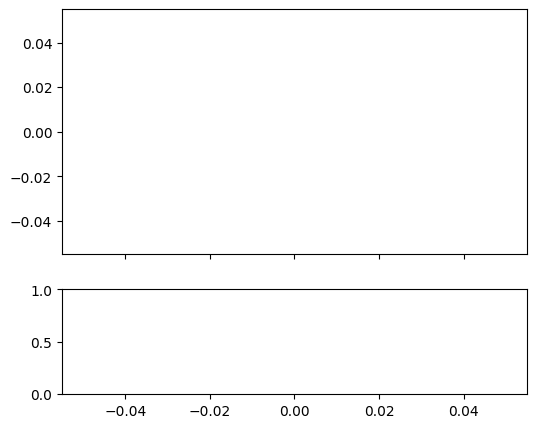

In [ ]:
#calling up our EDA function for exploring numeric
explore_numeric(df, feature)

In [ ]:
#looks like there's some duplicates in the index
##checking index for duplicates
df.index.duplicated().sum()

6964

In [ ]:
dup_index = df.index.duplicated(keep=False)
df[dup_index].sort_values(by='Item_Identifier')

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,,,,,,,,,,
DRA12,11.60,Low Fat,0.041178,Soft Drinks,140.3154,OUT017,NaN,Tier 2,Supermarket Type1,2552.6772
DRA12,11.60,Low Fat,0.041113,Soft Drinks,142.0154,OUT018,Medium,Tier 3,Supermarket Type2,850.8924
DRA12,11.60,Low Fat,0.000000,Soft Drinks,141.9154,OUT035,Small,Tier 2,Supermarket Type1,992.7078
DRA12,11.60,Low Fat,0.040912,Soft Drinks,142.3154,OUT013,High,Tier 3,Supermarket Type1,2552.6772
DRA12,11.60,Low Fat,0.068535,Soft Drinks,143.0154,OUT010,NaN,Tier 3,Grocery Store,283.6308
...,...,...,...,...,...,...,...,...,...,...
NCZ54,14.65,Low Fat,0.083359,Household,161.9552,OUT046,Small,Tier 1,Supermarket Type1,4711.2008
NCZ54,14.65,Low Fat,0.083528,Household,162.4552,OUT045,NaN,Tier 2,Supermarket Type1,2274.3728
NCZ54,14.65,Low Fat,0.000000,Household,161.5552,OUT010,NaN,Tier 3,Grocery Store,324.9104


In [ ]:
#resetting the index of the dataframe
df = df.reset_index()

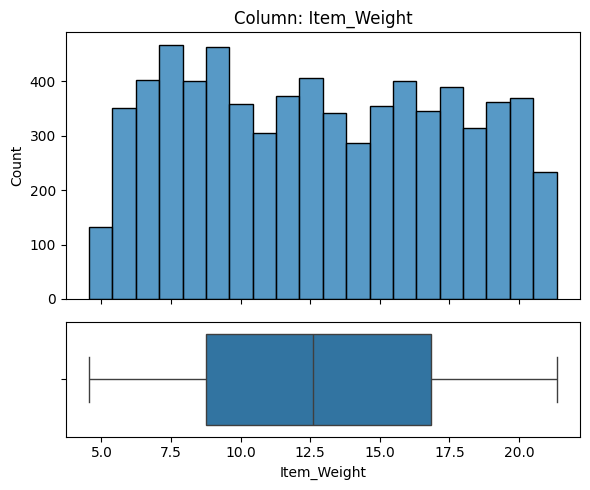

- NaN's Found: 1463 (17.17%)


In [ ]:
#calling up our EDA function for exploring numeric
explore_numeric(df, feature)

1) Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Numeric.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? if impute, with what?)
-- 1463 null values (17.1%).
-- In order to know how to handle them, I should try to determine if they are missing at random or if there is meaning in the fact that they are missing.
-- For this case there's no reason item weight should be missing unless if the item wasnt sold in a particular store.
- Determine if the null values are missing at random
--  we are going to check for other item related columns to establish if theyre also missing or zero. I would expect that if say the item weight was zero then the item wouldn't be visible anywhere.

In [ ]:
#checking for minimum value for item weight
df['Item_Weight'].min()

4.555

there's no item with zero weight

In [ ]:
#define columns to inspect related to Item
Item_cols = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility', 'Item_Type', 'Item_MRP']

creating a filter to view null values

In [ ]:
#saving the filter
filter_null_item_weight = df['Item_Weight'].isna()
filter_null_item_weight.sum()

1463

using loc to view the item columns with null for item weight

In [ ]:
check_items = df.loc[filter_null_item_weight,Item_cols]
check_items

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938
29,FDC14,NaN,Regular,0.072222,Canned,43.6454
...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552


In [ ]:
#obtaining null value counts for items
check_items.isna().sum()

Item_Identifier        0
Item_Weight         1463
Item_Fat_Content       0
Item_Visibility        0
Item_Type              0
Item_MRP               0
dtype: int64

the only column with nulls is the item weight. this most likely means that these values are missing at random.

Since the values are missing at random, we can impute them with:

- mean

- median Feature Observations

- Is the feature constant or quasi-constant?
-- No.

- What is the cardinality? Is it high?
-- Not applicable (numeric feature).
- Would we know this feature before the target is determined?
-- Yes.

- Is there a business case/understanding reason to exclude based on our business case?
-- Yes, this feature may play a vital role in predicting outlet sales.


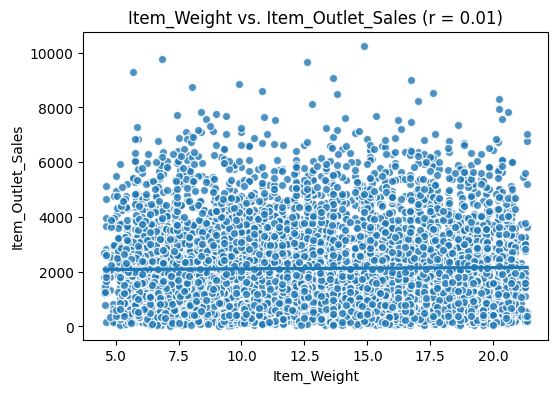

(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Weight vs. Item_Outlet_Sales (r = 0.01)'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>)

In [ ]:
#calling customs function to plot
plot_numeric_vs_target(df, feature)

2) Feature vs. Target Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes, I would think the weight of an item would play some role in its sale quantity.
- Does this feature appear to be a predictor of the target?
-- No, there is almost no relationship between this feature and the target as there's just a 0.001 positive correlation between the feature and the target (r=0.001).

#Item_Identifier
- Product ID

In [ ]:
#confirming feature datatype to know what EDA equation to use
feature = 'Item_Identifier'
df[feature].dtype

dtype('O')

<ipython-input-40-026af7de33c7>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


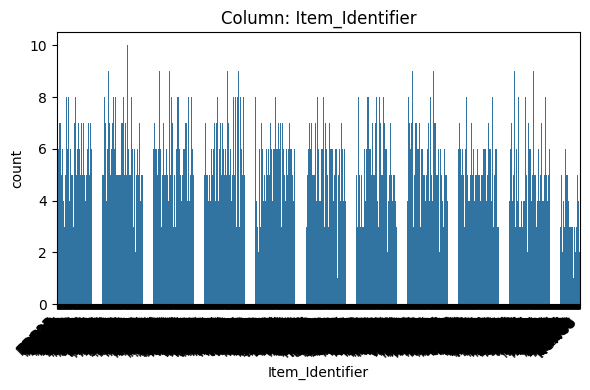

- NaN's Found: 0 (0.0%)
- Unique Values: 1559
- Most common value: 'FDW13' occurs 10 times (0.12%)
- Not constant or quasi-constant.


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Column: Item_Identifier'}, xlabel='Item_Identifier', ylabel='count'>)

In [ ]:
#calling up our EDA function for exploring categorical
explore_categorical(df, feature)

2) Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


-- 0 null values.
-- Nothing to impute.
- Is the feature constant or quasi-constant?
-- No, the most common value is only 0.12% of the feature.
- What is the cardinality? Is it high?
-- Very High, 1559 categories.
-- This feature may be problematic for modeling due to high cardinality.
- Would we know this BEFORE the target is determined
-- Yes.
- Is there a business case/understanding reason to exclude based on our business case?
I think item identifier maybe useful in determining which items are most sold in a particular store but since it has duplicate values it cant be a unique identifier for our data and should probably be dropped.

3) Multivariate Viz

<ipython-input-40-026af7de33c7>:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


(<Figure size 600x400 with 1 Axes>,
 <Axes: title={'center': 'Item_Identifier vs. Item_Outlet_Sales'}, xlabel='Item_Identifier', ylabel='Item_Outlet_Sales'>)

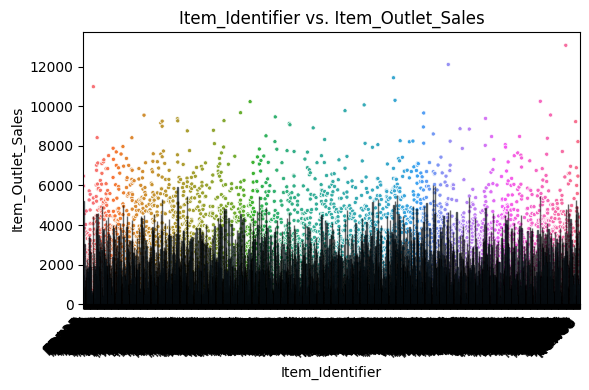

In [ ]:
plot_categorical_vs_target(df,feature)

4) Feature vs. Target Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- I would expect that the kind of item would determine outlet sales but not its identifier.
- Does this feature appear to be a predictor of the target?
-- Yes, there is variability across different items in terms of the means as well as the range of values.

#ITEM_FAT_CONTENT

- Whether the product is low fat or regular

In [ ]:
#confirming feature datatype to know what EDA equation to use
feature = 'Item_Fat_Content'
df[feature].dtype

dtype('O')

<ipython-input-40-026af7de33c7>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


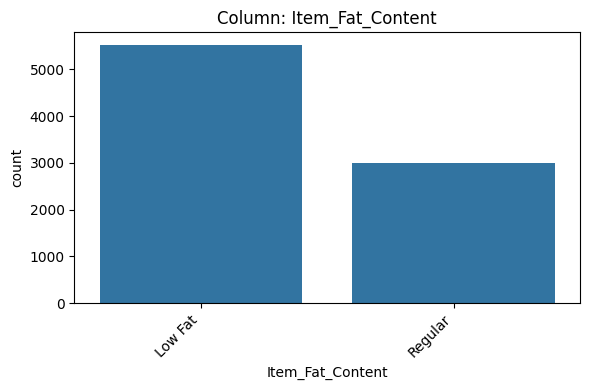

- NaN's Found: 0 (0.0%)
- Unique Values: 2
- Most common value: 'Low Fat' occurs 5517 times (64.73%)
- Not constant or quasi-constant.


In [ ]:
#calling up our EDA function for exploring categorical
explore_categorical(df, feature);

2) Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


-- 0 null values.
-- Nothing to impute.
- Is the feature constant or quasi-constant?
-- No, the most common value occurs 64.73% of the feature.
- What is the cardinality? Is it high?
-- Low, 2 categories.
-- This feature has low cardinality and would be good for our machine learning.
- Would we know this BEFORE the target is determined
-- Yes.
- Is there a business case/understanding reason to exclude based on our business case?
No, this would be vital in our model

3) Multivariate Viz

<ipython-input-40-026af7de33c7>:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


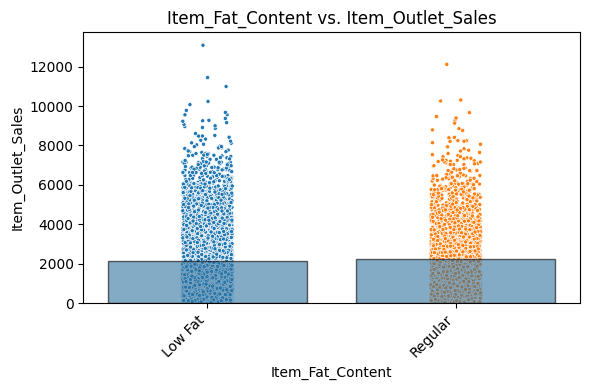

In [ ]:
plot_categorical_vs_target(df,feature);

4) Feature vs. Target Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- somewhat, People nowadays seem to appreciate healthy products .
- Does this feature appear to be a predictor of the target?
-- No, there is no variability across fat content of the item in regards to item outlet sales.

#ITEM_VISIBILITY

- The percentage of total display area of all products in a store allocated to the particular product

In [ ]:
#confirming feature datatype to know what EDA equation to use
feature = 'Item_Visibility'
df[feature].dtype

dtype('float64')

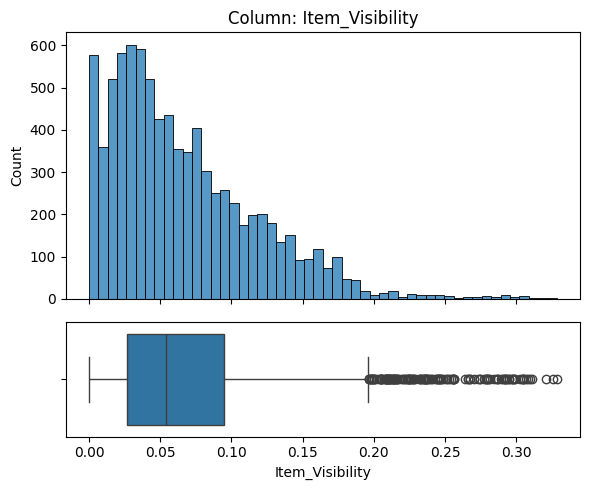

- NaN's Found: 0 (0.0%)


In [ ]:
#calling up our EDA function for exploring numeric
explore_numeric(df, feature);

2) Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Numeric.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


-- 0 null values.
-- Nothing to impute.
- Is the feature constant or quasi-constant?
-- No
- What is the cardinality? Is it high?
-- Not applicable(Numeric feature)
- Would we know this feature BEFORE the target is determined
-- Yes.
- Is there a business case/understanding reason to exclude based on our business case?
No, Item visibility maybe important in determining Item outlet sales and can be determined by the outlet.

3) Multivariate Viz

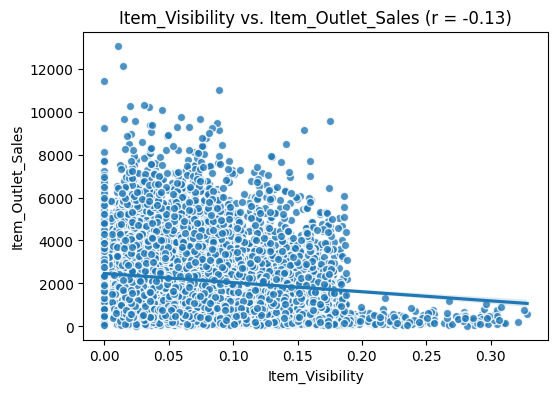

In [ ]:
plot_numeric_vs_target(df, feature);

4) Feature vs. Target Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes, I would expect how visible an item is to determine sales.
- Does this feature appear to be a predictor of the target?
-- Yes, there is a slight negative relationship of r=-0.13 between the target and the feature.

#ITEM_TYPE

- The category to which the product belongs

In [ ]:
#confirming feature datatype to know what EDA equation to use
feature = 'Item_Type'
df[feature].dtype

dtype('O')

<ipython-input-40-026af7de33c7>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


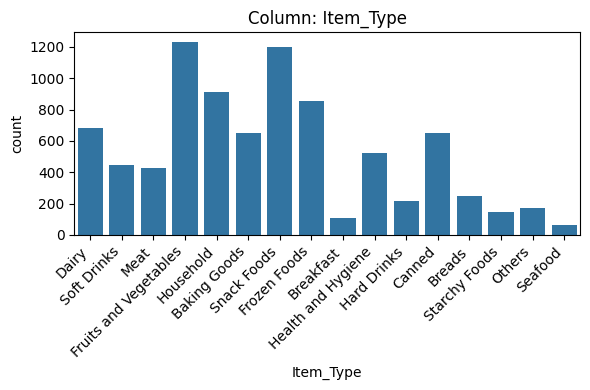

- NaN's Found: 0 (0.0%)
- Unique Values: 16
- Most common value: 'Fruits and Vegetables' occurs 1232 times (14.46%)
- Not constant or quasi-constant.


In [ ]:
#calling up our EDA function for exploring categorical
explore_categorical(df, feature);

2) Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


-- 0 null values.
-- Nothing to impute.
- Is the feature constant or quasi-constant?
-- No, the most common value is only 14.46% of the feature.
- What is the cardinality? Is it high?
-- High, 16 categories.
-- This feature may be problematic for modeling due to high cardinality.
- Would we know this feature BEFORE the target is determined
-- Yes.
- Is there a business case/understanding reason to exclude based on our business case?
Yes, where's the seller may determine what type of item is sold in their store, they cannot change any of the types

3) Multivariate Viz

<ipython-input-40-026af7de33c7>:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


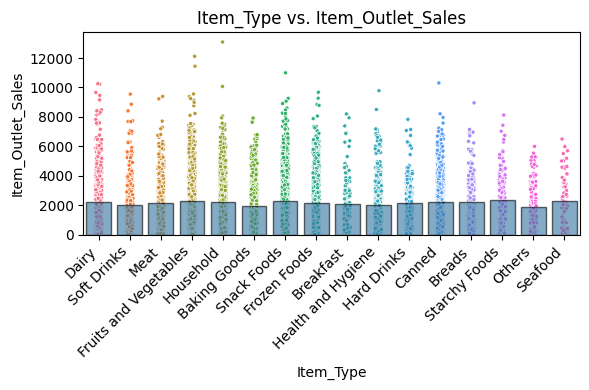

In [ ]:
plot_categorical_vs_target(df, feature);

4) Feature vs. Target Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes, I would somewhat expect this feature to be a predictor.
- Does this feature appear to be a predictor of the target?
-- Yes, there is slight variability across Item Outlet Sales in terms of the means as well as the range of values.

#ITEM_MRP

- Maximum retail price (list price) of the product

In [ ]:
#confirming feature datatype to know what EDA equation to use
feature = 'Item_MRP'
df[feature].dtype

dtype('float64')

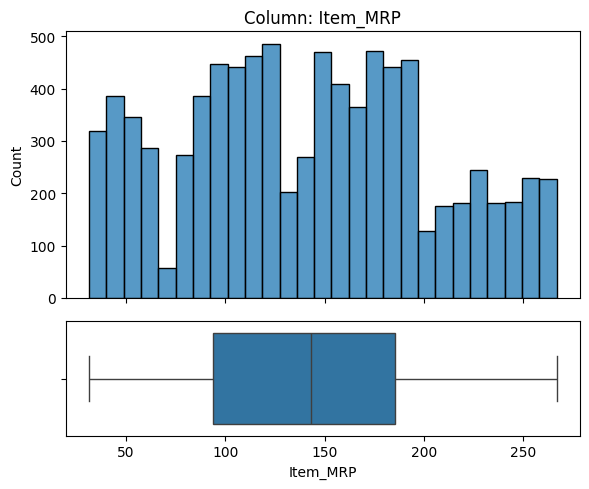

- NaN's Found: 0 (0.0%)


In [ ]:
#calling up our EDA function for exploring numeric
explore_numeric(df, feature);

2) Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- .Numeric
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


-- 0 null values.
-- Nothing to impute.
- Is the feature constant or quasi-constant?
-- No
- What is the cardinality? Is it high?
-- Not applicable. (Numeric feature)
- Would we know this feature BEFORE the target is determined
-- Yes.
- Is there a business case/understanding reason to exclude based on our business case?
No,

3) Multivariate Viz

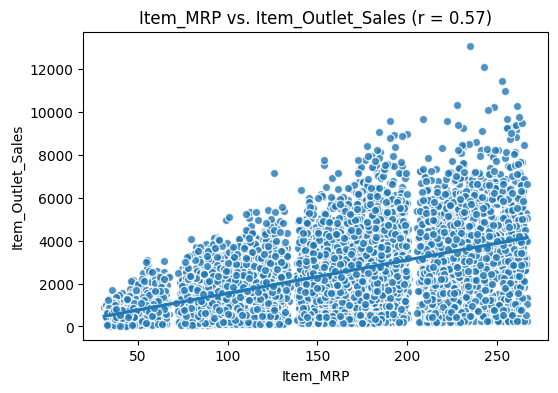

In [ ]:
plot_numeric_vs_target(df,feature);

4) Feature vs. Target Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes, I would somewhat expect this feature to be a predictor.
- Does this feature appear to be a predictor of the target?
-- Yes, there is variability across values with a medium positive correlation of r = 0.57 between values.

#OUTLET IDENTIFIER

- Store ID

In [ ]:
#confirming feature datatype to know what EDA equation to use
feature = 'Outlet_Identifier'
df[feature].dtype

dtype('O')

<ipython-input-40-026af7de33c7>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


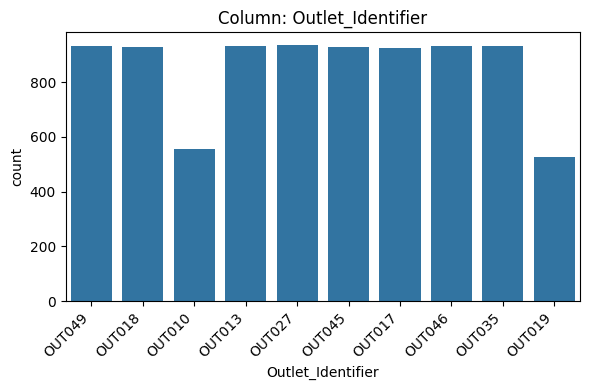

- NaN's Found: 0 (0.0%)
- Unique Values: 10
- Most common value: 'OUT027' occurs 935 times (10.97%)
- Not constant or quasi-constant.


In [ ]:
#calling up our EDA function for exploring categorical
explore_categorical(df, feature);

2) Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


-- 0 null values.
-- Nothing to impute.
- Is the feature constant or quasi-constant?
-- No, the most common value is only 10.97% of the feature.
- What is the cardinality? Is it high?
-- High, 10 categories.
-- This feature is just on the line for modeling due to it having 10 features cardinality.
- Would we know this BEFORE the target is determined
-- Yes.
- Is there a business case/understanding reason to exclude based on our business case?
No, this feature could determine outlet sales.

3) Multivariate Viz

<ipython-input-40-026af7de33c7>:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


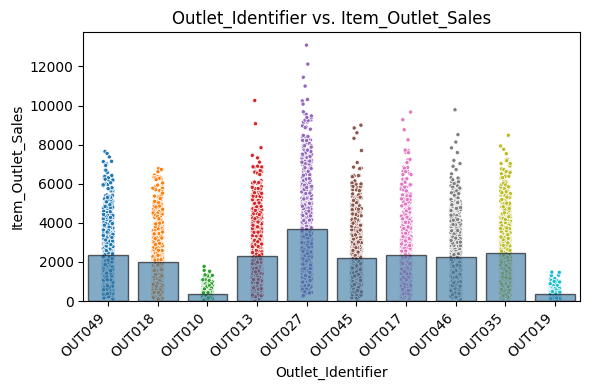

In [ ]:
plot_categorical_vs_target(df, feature);

4) Feature vs. Target Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes, I would expect the outlet identity to impact outlet sales (either positively or negatively).
- Does this feature appear to be a predictor of the target?
-- Yes, there is variability across outlets in terms of the means as well as the range of values.

#OUTLET_SIZE

- The size of the store in terms of ground area covered

In [ ]:
#confirming feature datatype to know what EDA equation to use
feature = 'Outlet_Size'
df[feature].dtype

dtype('O')

In [ ]:
#confirming value counts for outlet size
df['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [ ]:
#from above this is an ordinal feature with order
##determining order to use
order_Osize = ['Small', 'Medium', 'High']

<ipython-input-40-026af7de33c7>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


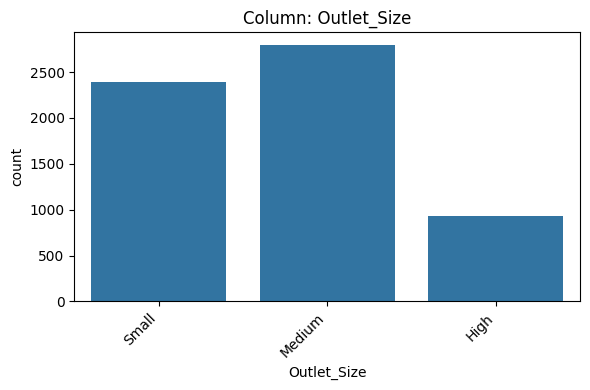

- NaN's Found: 2410 (28.28%)
- Unique Values: 4
- Most common value: 'Medium' occurs 2793 times (32.77%)
- Not constant or quasi-constant.


In [ ]:
#calling up our EDA function for exploring categorical
explore_categorical(df, feature, order=order_Osize);

2) Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Ordinal.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)
-- 2410 null values (28.28%).

- There's need to understand why there's null values.

In [ ]:
#lets look at the columns with outlet in them
outlet_cols = ['Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type']
outlet_cols

['Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']

In [ ]:
#saving the filter
filter_null_Outlet_Size = df['Outlet_Size'].isna()
filter_null_Outlet_Size.sum()

2410

In [ ]:
check_Outlets = df.loc[filter_null_Outlet_Size,outlet_cols]
check_Outlets

,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
3,OUT010,NaN,Tier 3,Grocery Store
8,OUT045,NaN,Tier 2,Supermarket Type1
9,OUT017,NaN,Tier 2,Supermarket Type1
25,OUT017,NaN,Tier 2,Supermarket Type1
28,OUT010,NaN,Tier 3,Grocery Store
...,...,...,...,...
8502,OUT045,NaN,Tier 2,Supermarket Type1
8508,OUT045,NaN,Tier 2,Supermarket Type1
8509,OUT010,NaN,Tier 3,Grocery Store
8514,OUT045,NaN,Tier 2,Supermarket Type1


In [ ]:
#obtaining null value counts for Outlets
check_Outlets.isna().sum()

Outlet_Identifier          0
Outlet_Size             2410
Outlet_Location_Type       0
Outlet_Type                0
dtype: int64

these values seem to be missing randomly. impute with placeholder


-- fill missing values with missing.
- Is the feature constant or quasi-constant?
-- No, the most common value is only 15% of the feature.
- What is the cardinality? Is it high?
-- low, 4 categories.
-- This feature may be important in determining our target.
- Would we know this BEFORE the target is determined
-- Yes.
- Is there a business case/understanding reason to exclude based on our business case?
No there's non

3) Multivariate Viz

<ipython-input-40-026af7de33c7>:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


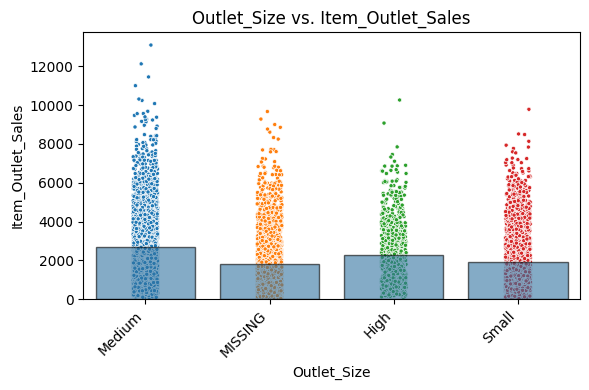

In [ ]:
plot_categorical_vs_target(df, feature);

4) Feature vs. Target Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes, I would expect this feature to be a predictor of the target (either positively or negatively).
- Does this feature appear to be a predictor of the target?
-- Yes, there is variability across Outlet type in terms of the means as well as the range of values.

#OUTLET_LOCATION_TYPE

- The type of area in which the store is located

In [ ]:
#confirming feature datatype to know what EDA equation to use
feature = 'Outlet_Location_Type'
df[feature].dtype

dtype('O')

<ipython-input-40-026af7de33c7>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


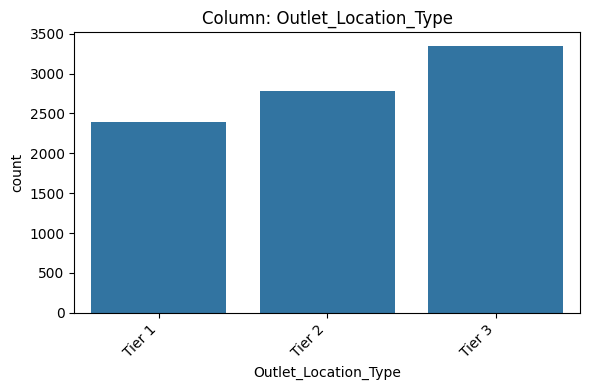

- NaN's Found: 0 (0.0%)
- Unique Values: 3
- Most common value: 'Tier 3' occurs 3350 times (39.31%)
- Not constant or quasi-constant.


In [ ]:
#calling up our EDA function for exploring categorical
explore_categorical(df, feature,order= ['Tier 1','Tier 2','Tier 3']);

2) Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


-- 0 null values.
-- Nothing to impute.
- Is the feature constant or quasi-constant?
-- No, the most common value is only 39.31% of the feature.
- What is the cardinality? Is it high?
-- Low, 4 categories.
-- This feature is okay for our ML model.
- Would we know this BEFORE the target is determined
-- Yes.
- Is there a business case/understanding reason to exclude based on our business case?
No, there's no case to exclude

3) Multivariate Viz

<ipython-input-40-026af7de33c7>:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


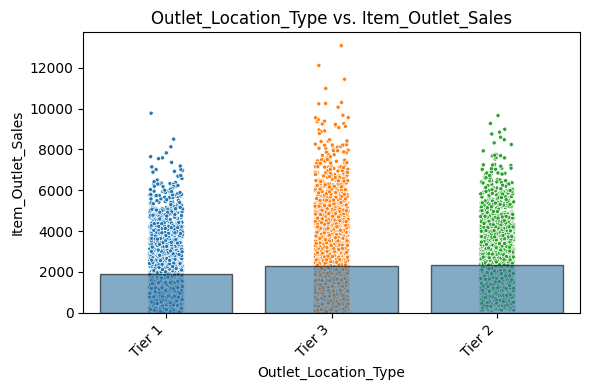

In [ ]:
plot_categorical_vs_target(df, feature);

4) Feature vs. Target Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes, I would expect the location of store to affect our target (either positively or negatively).
- Does this feature appear to be a predictor of the target?
-- Yes, there is variability across location type in terms of the means as well as the range of values.

#OUTLET_TYPE

- whether the outlet is a grocery or some sort of supermarket

In [ ]:
#confirming feature datatype to know what EDA equation to use
feature = 'Outlet_Type'
df[feature].dtype

dtype('O')

<ipython-input-40-026af7de33c7>:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


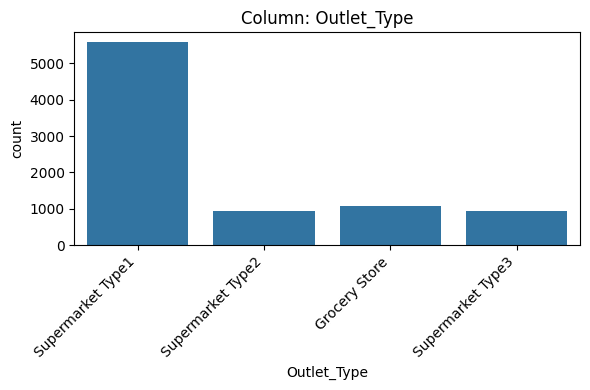

- NaN's Found: 0 (0.0%)
- Unique Values: 4
- Most common value: 'Supermarket Type1' occurs 5577 times (65.43%)
- Not constant or quasi-constant.


In [ ]:
#calling up our EDA function for exploring categorical
explore_categorical(df, feature,);

2) Feature Observations

- What type of feature is it? (Categorical (nominal), ordinal, numeric)
-- Categorical.
- How many null values? What percentage? What would you do with the null values (drop the rows? drop the column? impute? If impute, with what?)


-- 0 null values.
-- Nothing to impute.
- Is the feature constant or quasi-constant?
-- No, the most common value is only 65.43% of the feature.
- What is the cardinality? Is it high?
-- Low, 4 categories.
-- This feature would be okay for our ML model
- Would we know this BEFORE the target is determined
-- Yes.
- Is there a business case/understanding reason to exclude based on our business case?
No, there's non

3) Multivariate Viz

<ipython-input-40-026af7de33c7>:98: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


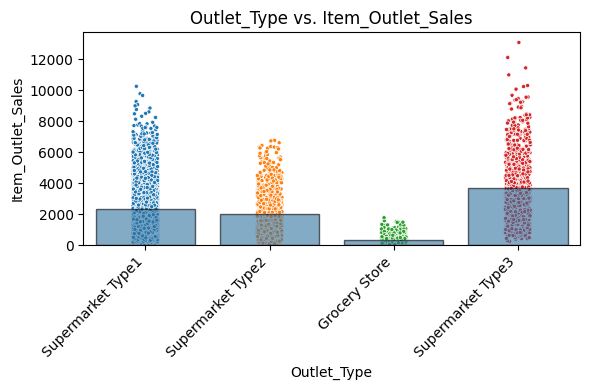

In [ ]:
plot_categorical_vs_target(df, feature);

4) Feature vs. Target Observations

- Based on your business understanding, would you expect this feature to be a predictor of the target?
-- Yes, I would expect the outlet type to impact our target (either positively or negatively).
- Does this feature appear to be a predictor of the target?
-- Yes, there is variability across outlets in terms of the means as well as the range of values.

In [ ]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns',100)
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, recall_score, precision_score, classification_report
# Set pandas as the default output for sklearn
from sklearn import set_config
set_config(transform_output='pandas')

In [ ]:
fpath = '/content/drive/MyDrive/StudentFolders16wk24wk/CodingDojo/02-IntroML/Week05/Data/sales_predictions_2023.csv'
df2 = pd.read_csv(fpath)
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#identifying duplicates and dropping them
df2.duplicated().sum()

0

there're no duplicates in the data to deal with

##Fixing inconsistencies in categorical data

In [ ]:
#defining list of categorical columns
cat_cols_list = df2.select_dtypes('object').columns
cat_cols_list

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [ ]:
#droping item identifier column
df2 = df2.drop(columns='Item_Identifier')
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                7060 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Identifier          8523 non-null   object 
 6   Outlet_Establishment_Year  8523 non-null   int64  
 7   Outlet_Size                6113 non-null   object 
 8   Outlet_Location_Type       8523 non-null   object 
 9   Outlet_Type                8523 non-null   object 
 10  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 732.6+ KB


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [ ]:
#checking value counts for item fat content as it seems weird being a categorical feature
df2['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

This is an ordinal feature which is supposed to have 2 values of Regular or Low fat. there seems to be some inconsistent values. Lets replace values of LF & low fat with Low Fat and those with reg with Regular.

In [ ]:
df2['Item_Fat_Content'] = df2['Item_Fat_Content'].replace({'LF':'Low Fat', 'low fat':'Low Fat', 'reg':'Regular'})
df2['Item_Fat_Content'].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [ ]:
#checking value counts of item type
df2['Item_Type'].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [ ]:
#checking value counts of outlet identifier
df2['Outlet_Identifier'].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [ ]:
#value counts for outlet size
df2['Outlet_Size'].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

This is also an ordinal feature

In [ ]:
#value counts for outlet location type
df2['Outlet_Location_Type'].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

this is also an ordinal feature

In [ ]:
#checking value counts for outlet type
df2['Outlet_Type'].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

In [ ]:
#Identifying the feature matrix X and the target y
X = df2.drop(columns='Item_Outlet_Sales')
y = df2['Item_Outlet_Sales']

In [ ]:
#performing a train_test_split on the data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)
X_train.info()
X_train.head()

<class 'pandas.core.frame.DataFrame'>
Index: 6392 entries, 4776 to 7270
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                5285 non-null   float64
 1   Item_Fat_Content           6392 non-null   object 
 2   Item_Visibility            6392 non-null   float64
 3   Item_Type                  6392 non-null   object 
 4   Item_MRP                   6392 non-null   float64
 5   Outlet_Identifier          6392 non-null   object 
 6   Outlet_Establishment_Year  6392 non-null   int64  
 7   Outlet_Size                4580 non-null   object 
 8   Outlet_Location_Type       6392 non-null   object 
 9   Outlet_Type                6392 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 549.3+ KB


,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
4776,16.350,Low Fat,0.029565,Household,256.4646,OUT018,2009,Medium,Tier 3,Supermarket Type2
7510,15.250,Regular,0.000000,Snack Foods,179.7660,OUT018,2009,Medium,Tier 3,Supermarket Type2
5828,12.350,Regular,0.158716,Meat,157.2946,OUT049,1999,Medium,Tier 1,Supermarket Type1
5327,7.975,Low Fat,0.014628,Baking Goods,82.3250,OUT035,2004,Small,Tier 2,Supermarket Type1
4810,19.350,Low Fat,0.016645,Frozen Foods,120.9098,OUT045,2002,NaN,Tier 2,Supermarket Type1


Starting with Numeric columns

In [ ]:
#defining list of numeric cols
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')

In [ ]:
#understanding distribution of numeric columns to understand how to deal with any null values
X_train[num_cols].describe().round(2)

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5285.00,6392.00,6392.00,6392.00
mean,12.90,0.07,141.98,1997.86
std,4.64,0.05,62.63,8.39
min,4.56,0.00,31.29,1985.00
25%,8.90,0.03,94.15,1987.00
50%,12.65,0.05,144.11,1999.00
75%,17.00,0.09,186.90,2004.00
max,21.35,0.33,266.89,2009.00


In [ ]:
#identifying missing values in numerci columns
X_train[num_cols].isna().sum()

Item_Weight                  1107
Item_Visibility                 0
Item_MRP                        0
Outlet_Establishment_Year       0
dtype: int64

Strategy for numeric columns
- Impute missing values with mean
- scale with standardscaler

In [ ]:
#making pipeline for numeric columns
#Instatiate transformers
num_imp = SimpleImputer(strategy='mean')
scaler = StandardScaler()
#numeric pipeline
num_pipe = make_pipeline(num_imp, scaler)
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
#creating numeric tuple for column transformer
num_tuple = ('Numeric',num_pipe, num_cols)
num_tuple

('Numeric',
 Pipeline(steps=[('simpleimputer', SimpleImputer()),
                 ('standardscaler', StandardScaler())]),
 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
        'Outlet_Establishment_Year'],
       dtype='object'))

Ordinal columns

In [ ]:
#defining list of ordinal columns
ord_cols = ['Outlet_Location_Type', 'Outlet_Size', 'Item_Fat_Content']
ord_cols

['Outlet_Location_Type', 'Outlet_Size', 'Item_Fat_Content']

In [ ]:
#instantiate transformers
#impute with most frequent value
ord_imp = SimpleImputer(strategy='most_frequent')
#declaring order for each column
ord_loc_type = ['Tier 1','Tier 2','Tier 3']
ord_out_size = ['Small','Medium','High']
ord_fat_cont = ['Low Fat','Regular']
ord_cat_ords = [ord_loc_type,ord_out_size,ord_fat_cont]
#Encoder
ord_encoder = OrdinalEncoder(categories=ord_cat_ords)
#Scaler
ord_scl = StandardScaler()
#pipepline
ord_pipe = make_pipeline(ord_imp,ord_encoder,ord_scl)
ord_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                ('ordinalencoder',
                 OrdinalEncoder(categories=[['Tier 1', 'Tier 2', 'Tier 3'],
                                            ['Small', 'Medium', 'High'],
                                            ['Low Fat', 'Regular']])),
                ('standardscaler', StandardScaler())])

In [ ]:
#making ordinal tuple
ord_tuple = ('Ordinal',ord_pipe, ord_cols)
ord_tuple

('Ordinal',
 Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='most_frequent')),
                 ('ordinalencoder',
                  OrdinalEncoder(categories=[['Tier 1', 'Tier 2', 'Tier 3'],
                                             ['Small', 'Medium', 'High'],
                                             ['Low Fat', 'Regular']])),
                 ('standardscaler', StandardScaler())]),
 ['Outlet_Location_Type', 'Outlet_Size', 'Item_Fat_Content'])

Categorical

In [ ]:
#defining list of categorical features
ohe_cols = X_train.select_dtypes('object').drop(columns=ord_cols).columns
ohe_cols

Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object')

In [ ]:
#Instantiate transformers
cat_imp = SimpleImputer(strategy='constant',fill_value='NA')
ohe_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
#categorical pipeline
cat_pipe = make_pipeline(cat_imp, ohe_encoder)
cat_pipe

Pipeline(steps=[('simpleimputer',
                 SimpleImputer(fill_value='NA', strategy='constant')),
                ('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse_output=False))])

In [ ]:
#making categorical tuple
cat_tuple = ('Categorical', cat_pipe, ohe_cols)
cat_tuple

('Categorical',
 Pipeline(steps=[('simpleimputer',
                  SimpleImputer(fill_value='NA', strategy='constant')),
                 ('onehotencoder',
                  OneHotEncoder(handle_unknown='ignore', sparse_output=False))]),
 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))

In [ ]:
# Instantiate with verbose_feature_names_out=False
preprocessing = ColumnTransformer([num_tuple, ord_tuple, cat_tuple], verbose_feature_names_out=False)
preprocessing

ColumnTransformer(transformers=[('Numeric',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                ('Ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categ...
                                                  StandardScaler())]),
                                 ['Outlet_Location_Type', 'Outlet_Size',
                                  'Item_Fat_Content']),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(fill_value='NA',
                                                                strategy='constant')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                  verbose_feature_names_out=False)

##importing custom regression functions

In [ ]:
#adding the functions
def regression_metrics(y_true, y_pred, label='', verbose = True, output_dict=False):
  # Get metrics
  mae = mean_absolute_error(y_true, y_pred)
  mse = mean_squared_error(y_true, y_pred)
  rmse = mean_squared_error(y_true, y_pred, squared=False)
  r_squared = r2_score(y_true, y_pred)
  if verbose == True:
    # Print Result with Label and Header
    header = "-"*60
    print(header, f"Regression Metrics: {label}", header, sep='\n')
    print(f"- MAE = {mae:,.3f}")
    print(f"- MSE = {mse:,.3f}")
    print(f"- RMSE = {rmse:,.3f}")
    print(f"- R^2 = {r_squared:,.3f}")
  if output_dict == True:
      metrics = {'Label':label, 'MAE':mae,
                 'MSE':mse, 'RMSE':rmse, 'R^2':r_squared}
      return metrics

def evaluate_regression(reg, X_train, y_train, X_test, y_test, verbose = True,
                        output_frame=False):
  # Get predictions for training data
  y_train_pred = reg.predict(X_train)

  # Call the helper function to obtain regression metrics for training data
  results_train = regression_metrics(y_train, y_train_pred, verbose = verbose,
                                     output_dict=output_frame,
                                     label='Training Data')
  print()
  # Get predictions for test data
  y_test_pred = reg.predict(X_test)
  # Call the helper function to obtain regression metrics for test data
  results_test = regression_metrics(y_test, y_test_pred, verbose = verbose,
                                  output_dict=output_frame,
                                    label='Test Data' )

  # Store results in a dataframe if ouput_frame is True
  if output_frame:
    results_df = pd.DataFrame([results_train,results_test])
    # Set the label as the index
    results_df = results_df.set_index('Label')
    # Set index.name to none to get a cleaner looking result
    results_df.index.name=None
    # Return the dataframe
    return results_df.round(3)

In [ ]:
#Instantiate Linear regression model and evaluate it
lin_reg = LinearRegression()
#creating model pipeline
mod_pipe = make_pipeline(preprocessing, lin_reg)
mod_pipe

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                                                   'Outlet_Size',
                                                   'Item_Fat_Content']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [ ]:
#fitting pipeline on training data
mod_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('Numeric',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer()),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  (...
                                                   'Outlet_Size',
                                                   'Item_Fat_Content']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(fill_value='NA',
                                                                                 strategy='constant')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                                   verbose_feature_names_out=False)),
                ('linearregression', LinearRegression())])

In [ ]:
#evaluating regression model using custom function
evaluate_regression(mod_pipe,X_train,y_train,X_test,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 847.129
- MSE = 1,297,558.126
- RMSE = 1,139.104
- R^2 = 0.562

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 804.120
- MSE = 1,194,349.643
- RMSE = 1,092.863
- R^2 = 0.567


* The r2 score of the Test Data is greater than that of the training data meaning the model performs beter on the test data than the training data is not overfit for that matter since the r2 score is also just .562 for the training data.
* there's also high bias as this model doesnt predict the test data so well at an r2 score of just about .567

#Random Forest Model

In [ ]:
#instantiate random forest model
rand_forest = RandomForestRegressor(random_state=42)
#creating model pipeline
forest_pipe = make_pipeline(preprocessing, rand_forest)
#fitting it on training data
forest_pipe.fit(X_train,y_train)
#evaluating model
evaluate_regression(forest_pipe,X_train,y_train,X_test,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 296.241
- MSE = 182,188.027
- RMSE = 426.835
- R^2 = 0.938

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 767.774
- MSE = 1,221,319.795
- RMSE = 1,105.133
- R^2 = 0.557


- The r2 score of training data id 0.93 while that of testing is 0.56 and way lower than that of the training set. this model is overfit on the training data and for that matter has probably picked up alot of noise. it is very biased on the testing set.
- The linear regression model has a slighly higher test score than the random forest model is would therefore be considered a better model overall since it also shows more balance between variance and bias than the random forest.

#Using gridsearch to get best_estimator

In [ ]:
#getting grid parameters
forest_pipe.get_params()

{'memory': None,
 'steps': [('columntransformer',
   ColumnTransformer(transformers=[('Numeric',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer()),
                                                    ('standardscaler',
                                                     StandardScaler())]),
                                    Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
          'Outlet_Establishment_Year'],
         dtype='object')),
                                   ('Ordinal',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='most_frequent')),
                                                    ('ordinalencoder',
                                                     OrdinalEncoder(categ...
                                                     StandardScaler())]),
                           

In [ ]:
#dictionary of grid parameters to tickle
grid_params = {'randomforestregressor__n_estimators': (10,20,50,100,200,500),
               'randomforestregressor__min_samples_leaf':(1,2,5,8,10),
               'randomforestregressor__max_features': (1,2,3)}
#instantiate grid search
grid_search = GridSearchCV(forest_pipe,grid_params,n_jobs=-1,verbose=1)
#fitting on training data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('Numeric',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer()),
                                                                                         ('standardscaler',
                                                                                          StandardScaler())]),
                                                                         Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year'],
      dtype='object')),
                                                                        ('Ordinal',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strat...
                                                                         Index(['Item_Type', 'Outlet_Identifier', 'Outlet_Type'], dtype='object'))],
                                                          verbose_feature_names_out=False)),
                                       ('randomforestregressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'randomforestregressor__max_features': (1, 2, 3),
                         'randomforestregressor__min_samples_leaf': (1, 2, 5, 8,
                                                                     10),
                         'randomforestregressor__n_estimators': (10, 20, 50,
                                                                 100, 200,
                                                                 500)},
             verbose=1)

In [ ]:
#getting best parameters
grid_search.best_params_

{'randomforestregressor__max_features': 3,
 'randomforestregressor__min_samples_leaf': 2,
 'randomforestregressor__n_estimators': 500}

In [ ]:
#fitting and evaluating best model
best_model = grid_search.best_estimator_
#evaluating model
evaluate_regression(best_model,X_train,y_train,X_test,y_test)

------------------------------------------------------------
Regression Metrics: Training Data
------------------------------------------------------------
- MAE = 584.305
- MSE = 676,248.445
- RMSE = 822.343
- R^2 = 0.771

------------------------------------------------------------
Regression Metrics: Test Data
------------------------------------------------------------
- MAE = 784.061
- MSE = 1,190,730.856
- RMSE = 1,091.206
- R^2 = 0.568


Yes the performace improved especially on the training set and slightly on the test set in terms of the r2 score

1. Overall I would recommend the gridsearch modified version of the random forest model as it gives the best results

2. This is because it has the highest r2 score on both the training and test sets of the data.

3. Based on r2 this model performs well on the training set being able to predict about 77.1% of our target accurately while only doing about 56.8% of the test set

4. This model also gives the smallest Mean Squared error for all the models meaning it makes the smaller errors from the true target of all the models

5. I selected this metric because it punishes the big errors very harshly.

6. comparing training vs test scores this model is somewhat overfit since it has a higher r2 score for the training data than for the test dataset